In [16]:
import pandas as pd
import sqlite3 as sq3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Dataset source
https://www.kaggle.com/datasets/mathurinache/world-happiness-report?select=2022.csv

- This project use sqlite through jupyther notebook to acquire answer from the dataset

In [2]:
con = sq3.connect("tutorial.db")

In [3]:
df2019 = pd.read_csv('2019.csv')

In [4]:
df2019.to_sql('Happiness2019', con, index = False, if_exists = 'replace')

C:\Users\squid\anaconda3\lib\site-packages\pandas\core\generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [ ]:
df2020 = pd.read_csv('2020.csv')

In [7]:
df2020.to_sql('Happiness2020', con, index = False, if_exists = 'replace')

In [8]:
con.execute("Select * FROM sqlite_master").fetchall()

[('table',
  'Happiness2019',
  'Happiness2019',
  2,
  'CREATE TABLE "Happiness2019" (\n"Overall rank" INTEGER,\n  "Country or region" TEXT,\n  "Score" REAL,\n  "GDP per capita" REAL,\n  "Social support" REAL,\n  "Healthy life expectancy" REAL,\n  "Freedom to make life choices" REAL,\n  "Generosity" REAL,\n  "Perceptions of corruption" REAL\n)'),
 ('table',
  'Happiness2020',
  'Happiness2020',
  7,
  'CREATE TABLE "Happiness2020" (\n"Country name" TEXT,\n  "Regional indicator" TEXT,\n  "Ladder score" REAL,\n  "Standard error of ladder score" REAL,\n  "upperwhisker" REAL,\n  "lowerwhisker" REAL,\n  "Logged GDP per capita" REAL,\n  "Social support" REAL,\n  "Healthy life expectancy" REAL,\n  "Freedom to make life choices" REAL,\n  "Generosity" REAL,\n  "Perceptions of corruption" REAL,\n  "Ladder score in Dystopia" REAL,\n  "Explained by: Log GDP per capita" REAL,\n  "Explained by: Social support" REAL,\n  "Explained by: Healthy life expectancy" REAL,\n  "Explained by: Freedom to make 

In [9]:
pd.read_sql("SELECT * FROM Happiness2019", con)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


1. Find top10 countries for each matric; over all score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, 
Generosity, and Percepetions of corruption

In [32]:
pd.read_sql("SELECT [Country or region], [Overall rank], [Score]\
              FROM Happiness2019\
              WHERE  [Overall rank] <= 10", con)

,Country or region,Overall rank,Score
0,Finland,1,7.769
1,Denmark,2,7.600
2,Norway,3,7.554
3,Iceland,4,7.494
4,Netherlands,5,7.488
5,Switzerland,6,7.480
6,Sweden,7,7.343
7,New Zealand,8,7.307
8,Canada,9,7.278
9,Austria,10,7.246


In [48]:
pd.read_sql("SELECT [Country or region], [Overall rank], [GDP per capita]\
                FROM Happiness2019 \
              ORDER BY [GDP per capita] DESC\
              LIMIT 10", con)

,Country or region,Overall rank,GDP per capita
0,Qatar,29,1.684
1,Luxembourg,14,1.609
2,Singapore,34,1.572
3,United Arab Emirates,21,1.503
4,Kuwait,51,1.500
5,Ireland,16,1.499
6,Norway,3,1.488
7,Switzerland,6,1.452
8,Hong Kong,76,1.438
9,United States,19,1.433


In [52]:
pd.read_sql("SELECT [Country or region], [Overall rank], [Social support]\
                FROM Happiness2019 \
              ORDER BY [Social support] DESC\
              LIMIT 10", con)

,Country or region,Overall rank,Social support
0,Iceland,4,1.624
1,Finland,1,1.587
2,Norway,3,1.582
3,Denmark,2,1.573
4,New Zealand,8,1.557
5,Ireland,16,1.553
6,Australia,11,1.548
7,United Kingdom,15,1.538
8,Turkmenistan,87,1.538
9,Mongolia,83,1.531


In [65]:
pd.read_sql("SELECT [Country or region], [Overall rank], [Healthy life expectancy]\
                FROM Happiness2019 \
              ORDER BY [Healthy life expectancy] DESC\
              LIMIT 10", con)

,Country or region,Overall rank,Healthy life expectancy
0,Singapore,34,1.141
1,Hong Kong,76,1.122
2,Japan,58,1.088
3,Spain,30,1.062
4,Switzerland,6,1.052
5,France,24,1.045
6,Cyprus,49,1.042
7,Northern Cyprus,64,1.042
8,Canada,9,1.039
9,Italy,36,1.039


In [55]:
pd.read_sql("SELECT [Country or region], [Overall rank], [Freedom to make life choices]\
                FROM Happiness2019 \
              ORDER BY [Freedom to make life choices] DESC\
              LIMIT 10", con)

,Country or region,Overall rank,Freedom to make life choices
0,Uzbekistan,41,0.631
1,Cambodia,109,0.609
2,Norway,3,0.603
3,United Arab Emirates,21,0.598
4,Finland,1,0.596
5,Denmark,2,0.592
6,Iceland,4,0.591
7,New Zealand,8,0.585
8,Canada,9,0.584
9,Sweden,7,0.574


In [56]:
pd.read_sql("SELECT [Country or region], [Overall rank], [Generosity]\
                FROM Happiness2019 \
              ORDER BY [Generosity] DESC\
              LIMIT 10", con)

,Country or region,Overall rank,Generosity
0,Myanmar,131,0.566
1,Indonesia,92,0.498
2,Haiti,147,0.419
3,Malta,22,0.375
4,Kenya,121,0.372
5,Bhutan,95,0.370
6,Thailand,52,0.359
7,Iceland,4,0.354
8,United Kingdom,15,0.348
9,Australia,11,0.332


In [57]:
pd.read_sql("SELECT [Country or region], [Overall rank], [Perceptions of corruption]\
                FROM Happiness2019 \
              ORDER BY [Perceptions of corruption] DESC\
              LIMIT 10", con)

,Country or region,Overall rank,Perceptions of corruption
0,Singapore,34,0.453
1,Rwanda,152,0.411
2,Denmark,2,0.410
3,Finland,1,0.393
4,New Zealand,8,0.380
5,Sweden,7,0.373
6,Switzerland,6,0.343
7,Norway,3,0.341
8,Luxembourg,14,0.316
9,Ireland,16,0.310


2. Find the country that had most generosity with the best social support

In [ ]:
pd.read_sql("SELECT [Country or region], [Overall rank], [Social support], [Generosity]\
                FROM Happiness2019 \
              ORDER BY [Social support] DESC\
              LIMIT 10", con)

,Country or region,Overall rank,Social support,Generosity
0,Iceland,4,1.624,0.354
1,Finland,1,1.587,0.153
2,Norway,3,1.582,0.271
3,Denmark,2,1.573,0.252
4,New Zealand,8,1.557,0.330
5,Ireland,16,1.553,0.298
6,Australia,11,1.548,0.332
7,United Kingdom,15,1.538,0.348
8,Turkmenistan,87,1.538,0.244
9,Mongolia,83,1.531,0.235


In [68]:
pd.read_sql("WITH temp AS\
               ( SELECT [Country or region], [Overall rank],  [Social support], [Generosity]\
                 FROM  Happiness2019 \
                 ORDER BY [Social support] DESC\
                 LIMIT 10)\
                SELECT [Country or region], [Overall rank],  [Social support], [Generosity]\
                      FROM temp \
                       ORDER BY [Generosity] DESC\
                      ", con)

,Country or region,Overall rank,Social support,Generosity
0,Iceland,4,1.624,0.354
1,United Kingdom,15,1.538,0.348
2,Australia,11,1.548,0.332
3,New Zealand,8,1.557,0.330
4,Ireland,16,1.553,0.298
5,Norway,3,1.582,0.271
6,Denmark,2,1.573,0.252
7,Turkmenistan,87,1.538,0.244
8,Mongolia,83,1.531,0.235
9,Finland,1,1.587,0.153


Ans - Iceland

3. Is generosity and GDP per capita depended on each other?

In [73]:
pd.read_sql("SELECT [Country or region], [Overall rank], [GDP per capita], [Generosity]\
                FROM Happiness2019 \
              ORDER BY [GDP per capita] ASC\
              LIMIT 10", con)

,Country or region,Overall rank,GDP per capita,Generosity
0,Somalia,112,0.000,0.243
1,Central African Republic,155,0.026,0.235
2,Burundi,145,0.046,0.176
3,Liberia,141,0.073,0.233
4,Congo (Kinshasa),127,0.094,0.212
5,Niger,114,0.138,0.188
6,Malawi,150,0.191,0.218
7,Mozambique,123,0.204,0.197
8,Sierra Leone,129,0.268,0.252
9,Comoros,142,0.274,0.275


In [82]:
pd.read_sql("WITH lastGDP AS\
               ( SELECT [Country or region], [Overall rank], [GDP per capita], [Generosity]\
                FROM Happiness2019 \
                ORDER BY [GDP per capita] ASC\
                LIMIT 10)\
                  SELECT AVG(Generosity)\
                      FROM lastGDP\
                      ", con)

,AVG(Generosity)
0,0.2229


In [83]:
pd.read_sql("SELECT [Country or region], [Overall rank], [GDP per capita], [Generosity]\
                FROM Happiness2019 \
              ORDER BY [GDP per capita] DESC\
              LIMIT 10", con)

,Country or region,Overall rank,GDP per capita,Generosity
0,Qatar,29,1.684,0.220
1,Luxembourg,14,1.609,0.194
2,Singapore,34,1.572,0.271
3,United Arab Emirates,21,1.503,0.262
4,Kuwait,51,1.500,0.142
5,Ireland,16,1.499,0.298
6,Norway,3,1.488,0.271
7,Switzerland,6,1.452,0.263
8,Hong Kong,76,1.438,0.258
9,United States,19,1.433,0.280


In [84]:
pd.read_sql("WITH topGDP AS\
               ( SELECT [Country or region], [Overall rank], [GDP per capita], [Generosity]\
                FROM Happiness2019 \
              ORDER BY [GDP per capita] DESC\
              LIMIT 10)\
                  SELECT AVG(Generosity)\
                      FROM topGDP\
                      ", con)

,AVG(Generosity)
0,0.2459


<AxesSubplot:xlabel='GDP per capita', ylabel='Generosity'>

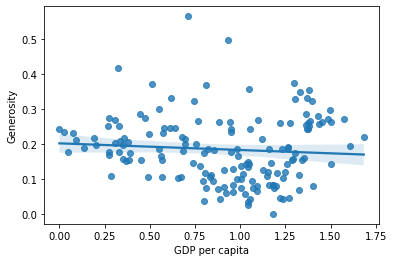

In [15]:
sns.regplot(x = 'GDP per capita', y = 'Generosity', data = df2019)

Ans - From the data, countries with low GDP didn't have to have less genorosity than countries with high GDP. And overall, countries with higher GDP had less generosity.  

In [101]:
df2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


4. Is there a connection between GDP and healthy life expectancy?

In [116]:
pd.read_sql("SELECT [Country name], [Logged GDP per capita], [Healthy life expectancy]\
              FROM Happiness2020 \
              ORDER BY [Logged GDP per capita] DESC\
              LIMIT 10", con)

,Country name,Logged GDP per capita,Healthy life expectancy
0,Luxembourg,11.450681,72.599998
1,Singapore,11.395521,76.804581
2,Ireland,11.160978,72.300789
3,United Arab Emirates,11.109999,67.082787
4,Kuwait,11.089825,66.767647
5,Norway,11.087804,73.200783
6,Switzerland,10.979933,74.102448
7,Hong Kong S.A.R. of China,10.934671,76.771706
8,United States,10.925769,68.299500
9,Netherlands,10.812712,72.300919


In [117]:
pd.read_sql("SELECT [Country name], [Logged GDP per capita], [Healthy life expectancy]\
              FROM Happiness2020 \
              ORDER BY [Healthy life expectancy] DESC\
              LIMIT 10", con)

,Country name,Logged GDP per capita,Healthy life expectancy
0,Singapore,11.395521,76.804581
1,Hong Kong S.A.R. of China,10.934671,76.771706
2,Japan,10.579689,75.000969
3,Spain,10.462927,74.402710
4,Switzerland,10.979933,74.102448
5,France,10.584223,73.801933
6,Cyprus,10.405703,73.702225
7,North Cyprus,10.405703,73.702225
8,Australia,10.720596,73.604538
9,South Korea,10.510567,73.602730


Text(0.5, 1.0, 'GDP vs Healthy life expectancy 2019')

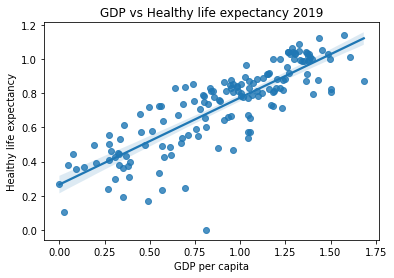

In [19]:
sns.regplot(x = 'GDP per capita', y = 'Healthy life expectancy', data = df2019)
plt.title('GDP vs Healthy life expectancy 2019')

Text(0.5, 1.0, 'GDP vs Healthy life expectancy 2020')

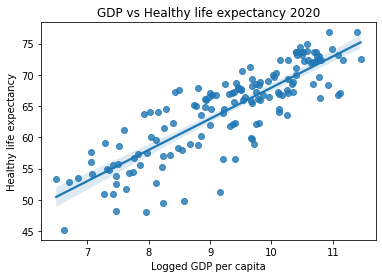

In [20]:
sns.regplot(x = 'Logged GDP per capita', y = 'Healthy life expectancy', data = df2020)
plt.title('GDP vs Healthy life expectancy 2020')

Ans - It was clearly that counties with high GDP have more healthy life expectancy.

5. Find the average happiness score according to the region.

In [115]:
pd.read_sql("SELECT  [Regional indicator], COUNT([Country name]), AVG([Ladder score])\
              FROM Happiness2020 \
              GROUP BY [Regional indicator]\
              ORDER BY AVG([Ladder score]) DESC\
              ", con)

,Regional indicator,COUNT([Country name]),AVG([Ladder score])
0,North America and ANZ,4,7.173525
1,Western Europe,21,6.899219
2,Latin America and Caribbean,21,5.981786
3,Central and Eastern Europe,17,5.883818
4,East Asia,6,5.714850
5,Southeast Asia,9,5.383367
6,Commonwealth of Independent States,12,5.358342
7,Middle East and North Africa,17,5.227159
8,South Asia,7,4.475443
9,Sub-Saharan Africa,39,4.383495


In [118]:
con.close()